<a href="https://colab.research.google.com/github/jear2412/PyTorchExamples/blob/main/sinx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-

# basic example: L2 loss to approximate sin x with a polynomial of degree 3
#Objective: learn how to use tensors and an introduction to autograd 

import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style='darkgrid', palette='deep')

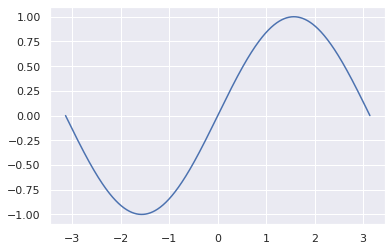

In [2]:
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x) 

plt.plot(x, y)

In [4]:
# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
#iterative gradient descent 
for t in range(3000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum() #partial L respect to a
    grad_b = (grad_y_pred * x).sum() #partial L respect to b
    grad_c = (grad_y_pred * x ** 2).sum() #partial L respect to c
    grad_d = (grad_y_pred * x ** 3).sum() #partial L respect to d

    # Update weights --> gradient descent 
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 1638.1961377506218
199 1129.92818005018
299 781.0652359499809
399 541.3422141975184
499 376.4300107461928
599 262.8561150762373
699 184.55274425492706
799 130.50828338266174
899 93.16758608290814
999 67.34111549300309
1099 49.460220322009654
1199 37.06813169198383
1299 28.47166997217953
1399 22.50264587640052
1499 18.35422045177188
1599 15.468546676743856
1699 13.459534680086136
1799 12.059701303712004
1899 11.083553206350796
1999 10.402332861100483
2099 9.926582621612026
2199 9.594093864341048
2299 9.361569425669483
2399 9.198849311220304
2499 9.084907693660499
2599 9.005075186567542
2699 8.949109553609496
2799 8.90985449320478
2899 8.882306428469667
2999 8.86296463543697
Result: y = 0.006823027626391579 + 0.8587444392273816 x + -0.0011770858012223192 x^2 + -0.09361538314597924 x^3


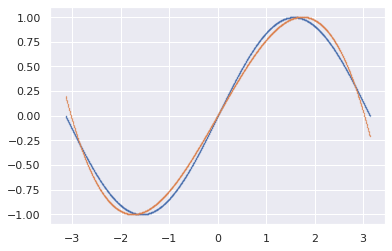

In [5]:
plt.plot( x, y, '.' , label='sin x' , markersize=0.5 )
plt.plot( x, a+b*x+c*x**2+d*x**3 , '.', label= 'approx', markersize=0.5 )

In [7]:
import torch #we will use tensors now
import math

dtype = torch.float
device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU


In [ ]:

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(4000):
    # Forward pass: compute predicted y / forward map: just evaluate y hat
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss // quadratic loss or least squares 
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    # gradient descent
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

#manual implementation of both forward and backward process

#use autograd: the forward map defines a computational graph 
# nodes: tensors
# edges: functions that produce output tensors from input tensors

#backpropagation allows calculation of gradients!

#x.requires_grad=True then x.grad is another Tensor holding the gradient of x with respect to some scalar value!




In [ ]:
# Here we use PyTorch Tensors and autograd to implement our fitting sine wave with third order polynomial example 
import torch
import math

dtype = torch.float
#device = torch.device("cpu")
device = torch.device("cuda:0")  

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3

# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(4000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)

    # loss.item() gets the scalar value held in the loss. --> very important!
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.

    

    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3') #once again items holds the value we are interested in 

